<a href="https://colab.research.google.com/github/YousraFarhani/MNIST-Hand-Digits-CNN/blob/main/MNIST_Hand_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Each image in the MNIST dataset is 28x28 and contains a centered, grayscale digit. We'll flatten each 28x28 into a 784 dimensional vector, which we'll use as an input vector to our neural network.

Our target will be one of 10 possible classes: one for each digit.

In [ ]:
import numpy as np         
import pandas as pd
import matplotlib.pyplot as plt      
import random                        

from keras.datasets import mnist     
from keras.models import Sequential  

from keras.layers.core import Dense, Dropout, Activation 
from keras.utils import np_utils   

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [ ]:
test_data = pd.read_csv('/content/sample_data/test.csv', delimiter = ',', header = 0, usecols = [x for x in range(0, 784)])

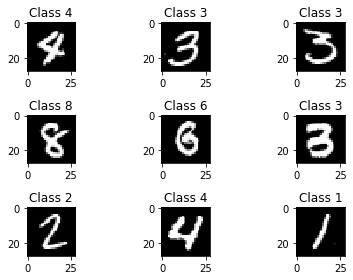

In [ ]:
for i in range(9):
    plt.subplot(3,3,i+1)
    num = random.randint(0, len(X_train))
    plt.imshow(X_train[num], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[num]))
plt.tight_layout()

In [ ]:
X_train = X_train.reshape(60000, 784) 
X_test = X_test.reshape(10000, 784)   

X_train = X_train.astype('float32')   
X_test = X_test.astype('float32')

X_train /= 255                        
X_test /= 255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (60000, 784)
Testing matrix shape (10000, 784)


In [ ]:
no_classes = 10

Y_train = np_utils.to_categorical(y_train, no_classes)    #one hot encoding = categorical to numerical 
Y_test = np_utils.to_categorical(y_test, no_classes)

In [ ]:
#to have the API of layers as a sequential
model = Sequential()
model.add(Dense(512, input_shape=(784,))) 
model.add(Activation('relu'))

To avoid the overfitting of the model we randomly drop out some nodes

In [ ]:
model.add(Dropout(0.2))

In [ ]:
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

#output layer
The Softmax Activation represents a probability distribution over n different possible outcomes. Its values are all non-negative and sum to 1. For example, if the final output is: [0, 0.94, 0, 0, 0, 0, 0, 0.06, 0, 0] then it is most probable that the image is that of the digit 1

In [ ]:
model.add(Dense(10)) #The final layer of 10 neurons in fully-connected to the previous 512-node layer. The final layer should be equal to the number of desired output classes.
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 512)               401920    
                                                                 
 activation_10 (Activation)  (None, 512)               0         
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 512)               262656    
                                                                 
 activation_11 (Activation)  (None, 512)               0         
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_13 (Dense)            (None, 10)               

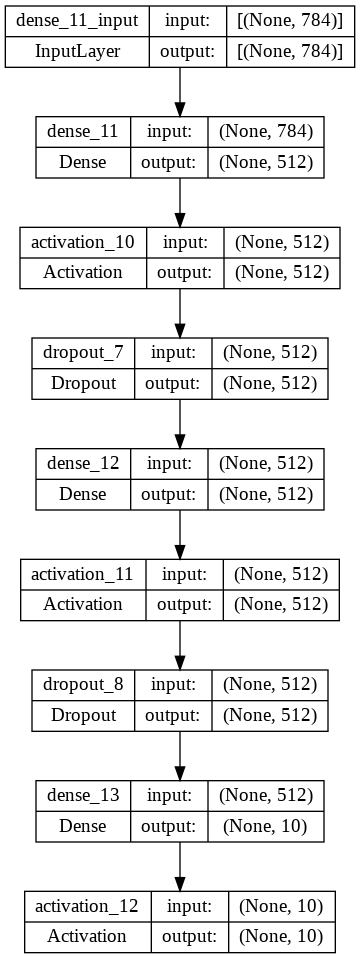

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_chart.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image("model_chart.png")

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=10,
          verbose=1 ) #verbose=0 will show you nothing (silent).   verbose=1 will show you an animated progress bar like this =========

Epoch 1/10
469/469 [==============================] - 13s 27ms/step - loss: 0.2529 - accuracy: 0.9227
Epoch 2/10
469/469 [==============================] - 16s 34ms/step - loss: 0.0993 - accuracy: 0.9693
Epoch 3/10
469/469 [==============================] - 9s 19ms/step - loss: 0.0711 - accuracy: 0.9773
Epoch 4/10
469/469 [==============================] - 11s 24ms/step - loss: 0.0563 - accuracy: 0.9817
Epoch 5/10
469/469 [==============================] - 15s 33ms/step - loss: 0.0468 - accuracy: 0.9844
Epoch 6/10
469/469 [==============================] - 11s 23ms/step - loss: 0.0383 - accuracy: 0.9873
Epoch 7/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0345 - accuracy: 0.9890
Epoch 8/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0301 - accuracy: 0.9904
Epoch 9/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0285 - accuracy: 0.9900
Epoch 10/10
469/469 [==============================] - 8s 17ms/step - loss: 0.0250 - a

#Model evaluation

In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test accuracy:', score[1])

313/313 [==============================] - 1s 4ms/step - loss: 0.0666 - accuracy: 0.9821
Test accuracy: 0.9821000099182129


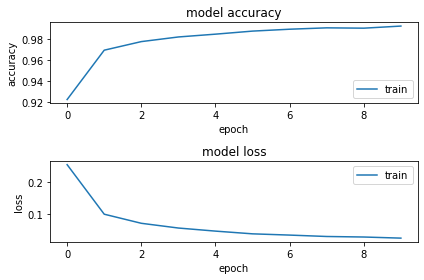

In [ ]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper right')

plt.tight_layout()


In [ ]:
results = model.predict(test_data)

875/875 [==============================] - 3s 4ms/step


In [ ]:
results = np.argmax(results,axis = 1)
results = pd.Series(results,name="Label")
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)
submission.to_csv("submission.csv",index=False)

In [ ]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [ ]:
print(y_test)

[7 2 1 ... 4 5 6]


In [ ]:
predictions = np.argmax(model.predict(X_test), axis=-1)
print(predictions)

correct_indices = np.nonzero(predictions == y_test)[0]

incorrect_indices = np.nonzero(predictions != y_test)[0]

313/313 [==============================] - 2s 5ms/step
[0 0 0 ... 0 0 0]


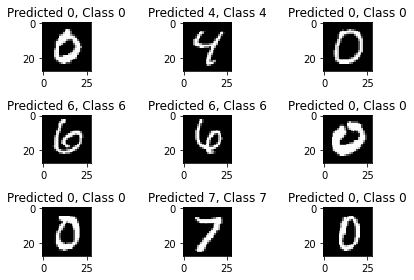

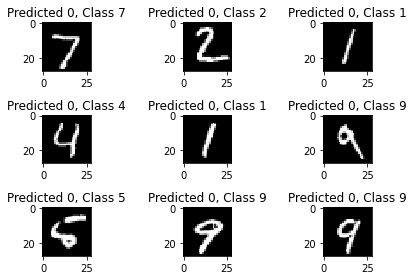

In [ ]:
plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predictions[correct], y_test[correct]))
plt.tight_layout()
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predictions[incorrect], y_test[incorrect]))
plt.tight_layout()